In [1]:
%pylab inline
import math
import random
import pandas as pd
import numpy as np
from glass_input.cloud_packer import CloudPacker
from glass_input.cloud_packer2 import CloudPacker2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [7]:
IMAGE_WIDTH = 1280
IMAGE_HEIGHT = 720
def generate_random_windows(number_windows = 10):
   windows = []

   for n in range(number_windows):
      windows.append({"window": n,
                      "w": random.randint(0, math.floor(IMAGE_WIDTH / 3)),
                      "h": random.randint(0, math.floor(IMAGE_HEIGHT / 4))})

   return windows

In [8]:
myblocks3 = generate_random_windows(number_windows = 3)
myblocks4 = generate_random_windows(number_windows = 4)
myblocks5 = generate_random_windows(number_windows = 5)
myblocks6 = generate_random_windows(number_windows = 6)
myblocks7 = generate_random_windows(number_windows = 7)
myblocks20 = generate_random_windows(number_windows = 20)


In [96]:
blocks = pd.DataFrame([{"window": b["window"], "w": b["w"], "h": b["h"]} for b in myblocks20])
blocks = blocks.assign(area=blocks.w * blocks.h, fit=False).sort_values("area", ascending=False).set_index("window")
blocks

,w,h,area,fit
window,,,,
4,370,176,65120,False
10,386,164,63304,False
17,342,177,60534,False
16,390,135,52650,False
1,414,120,49680,False
0,244,176,42944,False
3,284,150,42600,False
15,362,110,39820,False
8,254,152,38608,False


In [97]:
corners = pd.DataFrame(index=blocks.index, columns=np.arange(4)).melt(var_name="corner", ignore_index=False).reset_index().set_index(["window", "corner"])[[]].assign(r=np.nan, th=np.nan, x=np.nan, y=np.nan)
corners

,,r,th,x,y
window,corner,,,,
4,0,NaN,NaN,NaN,NaN
10,0,NaN,NaN,NaN,NaN
17,0,NaN,NaN,NaN,NaN
16,0,NaN,NaN,NaN,NaN
1,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
13,3,NaN,NaN,NaN,NaN
14,3,NaN,NaN,NaN,NaN
19,3,NaN,NaN,NaN,NaN


In [98]:
th = 0
r = 0

In [99]:
nextblockidx = blocks.index[~blocks.fit][0]
nextblock = blocks.iloc[nextblockidx]

In [100]:
xdir = 1
if th > np.pi / 2 and th < 2 * np.pi / 3:
    xdir = -1
ydir = 1
if th > np.pi:
    ydir = -1

corners.loc[(nextblockidx, 0), "x"] = np.cos(th) * r
corners.loc[(nextblockidx, 0), "y"] = np.sin(th) * r

corners.loc[(nextblockidx, 1), "x"] = corners.loc[(nextblockidx, 0), "x"] + xdir * nextblock["w"]
corners.loc[(nextblockidx, 1), "y"] = corners.loc[(nextblockidx, 0), "y"]
corners.loc[(nextblockidx, 2), "x"] = corners.loc[(nextblockidx, 0), "x"] + xdir * nextblock["w"]
corners.loc[(nextblockidx, 2), "y"] = corners.loc[(nextblockidx, 0), "y"] + ydir * nextblock["h"]
corners.loc[(nextblockidx, 3), "x"] = corners.loc[(nextblockidx, 0), "x"]
corners.loc[(nextblockidx, 3), "y"] = corners.loc[(nextblockidx, 0), "y"] + ydir * nextblock["h"]

for corner in range(4):
    x = corners.loc[(nextblockidx, corner), "x"] 
    y = corners.loc[(nextblockidx, corner), "y"] 
    corners.loc[(nextblockidx, corner), "r"] = np.sqrt(x**2 + y**2)
    corners.loc[(nextblockidx, corner), "th"]  = arctan2(y, x)

blocks.loc[nextblockidx, "min_th"] = corners.loc[nextblockidx].th.min()
blocks.loc[nextblockidx, "max_th"] = corners.loc[nextblockidx].th.max()
blocks.loc[nextblockidx, "min_th_r"] = corners.loc[(nextblockidx, corners.loc[nextblockidx].th.argmin()), "r"]
blocks.loc[nextblockidx, "max_th_r"] = corners.loc[(nextblockidx, corners.loc[nextblockidx].th.argmax()), "r"]
blocks.loc[nextblockidx, "max_r"] = corners.loc[nextblockidx].r.max()
blocks.loc[nextblockidx, "max_r_th"] = corners.loc[(nextblockidx, corners.loc[nextblockidx].r.argmax()), "th"]
    
th = corners.loc[nextblockidx, "th"].max()


In [101]:
th

1.5707963267948966

In [102]:
corners.loc[nextblockidx]

,r,th,x,y
corner,,,,
0,0.000000,0.000000,0.0,0.0
1,414.000000,0.000000,414.0,0.0
2,431.040601,0.282124,414.0,120.0
3,120.000000,1.570796,0.0,120.0


In [103]:
blocks.loc[nextblockidx]

w                  370
h                  176
area             65120
fit              False
min_th             0.0
max_th        1.570796
min_th_r           0.0
max_th_r         120.0
max_r       431.040601
max_r_th      0.282124
Name: 4, dtype: object

In [104]:
th = 1

In [115]:
overlapping = (blocks.min_th < th) & (blocks.max_th > th) & ((blocks.min_th_r > r) | (blocks.max_th_r > r) | (blocks.max_r > r))

In [112]:
corners.loc[blocks.index[overlapping]].th.max()

1.5707963267948966

In [121]:
blocks.loc[overlapping].max_r.argmax()

0

In [ ]:
IMAGE_WIDTH = 1280
IMAGE_HEIGHT = 720
MARGIN = 0.1

def generate_random_windows(number_windows = 10):
   windows = []

   for n in range(number_windows):
      windows.append({"window": n,
                      "w": random.randint(0, math.floor(IMAGE_WIDTH / 3)),
                      "h": random.randint(0, math.floor(IMAGE_HEIGHT / 4))})

   return windows

def cloud_packer_test(number_windows=10, view_width=IMAGE_WIDTH, view_height=IMAGE_HEIGHT, margin=MARGIN, Packer=CloudPacker):
   cloud_packer_test_blocks(generate_random_windows(number_windows), view_width=view_width, view_height=view_height, margin=margin, Packer=Packer)

def cloud_packer_test_blocks(blocks, view_width=IMAGE_WIDTH, view_height=IMAGE_HEIGHT, margin=MARGIN, Packer=CloudPacker):
    print(f"{blocks}\n")
    packer = Packer()
    maxw = max([shape["w"] for shape in blocks])
    maxh = max([shape["h"] for shape in blocks])

    blocks = packer.fit(blocks, view_width=view_width, view_height=view_height, margin=margin * maxw)
    print(f"packed blocks: {blocks}\n")

    plt.figure(figsize=(16, 9))
    ax = plt.gca()
    minx = maxx = blocks[0]["fit"]["x"]
    miny = maxy = blocks[0]["fit"]["y"]
    for shape in blocks:
      color = "#" + ''.join([random.choice('ABCDEF0123456789') for _ in range(6)])
      print(f"shape: {shape}")
      ax.add_patch(
          Rectangle(
              (shape["fit"]["x"], shape["fit"]["y"]),
              shape["w"], shape["h"],
              edgecolor=color, color=color, alpha=0.5))
      if "explanation" in shape["fit"]:
          ax.text(shape["fit"]["x"], shape["fit"]["y"], shape["fit"]["explanation"])
      if shape["fit"]["x"] < minx: minx = shape["fit"]["x"]
      if shape["fit"]["x"] + shape["w"] > maxx: maxx = shape["fit"]["x"] + shape["w"]
      if shape["fit"]["y"] < miny: miny = shape["fit"]["y"]
      if shape["fit"]["y"] + shape["h"] > maxy: maxy = shape["fit"]["y"] + shape["h"]

    if hasattr(packer, "bboxes"):
        for bbox in packer.bboxes:
            color = "#" + ''.join([random.choice('ABCDEF0123456789') for _ in range(6)])
            ax.add_patch(
                Rectangle((bbox["min"]["x"], bbox["min"]["y"]),
                          bbox["max"]["x"] - bbox["min"]["x"], bbox["max"]["y"] - bbox["min"]["y"],
              edgecolor="black", fill=False))

    if hasattr(packer, "bbox_aspect_ratio"):
        print("Packed aspect ratio", packer.bbox_aspect_ratio)
            
    plt.ylim(miny, maxy)
    plt.xlim(minx, maxx)

    plt.show()

In [149]:
class CloudPacker():
   # TODO: assign a weight to each window according to their area, width, height.
   #       These will be used to determine the order in which the windows are placed,
   #       in accordance with the aspect ratio of the root window.
   radius = 1.0
   step = 10

   def organic_sort(self, block):
      return (block["w"] * block["h"])

   def fit(self, blocks, view_width, view_height, margin=0, sorting="organic"):
      print("FIT", repr([blocks, view_width, view_height]))
      self.view_width = view_width
      self.view_height = view_height
      self.aspect_ratio = view_width / view_height
      self.margin = margin # TODO: implement margin

      blocks.sort(key=self.organic_sort, reverse=True)

      placements = []
      spiral = self.spiral_generator()

      for position, block in enumerate(blocks):
         window = block["window"]
         w = block["w"]
         h = block["h"]
            
         self.radius = math.sqrt(w**2+h**2)/100
         px, py = next(spiral)
         dx, dy = self.find_window_center_coordinates([window, px, py, w, h])

         block["fit"] = {"x": dx, "y": dy}

         while(position and self.is_window_intersect_view(block, placements)):
            px, py = next(spiral)
            dx, dy = self.find_window_center_coordinates([window, px, py, w, h])
            block["fit"] = {"x": dx, "y": dy}

         placements.append(block)

      return placements

   def spiral_generator(self):
      h = (self.view_width / 2)
      k = (self.view_height / 2)
      theta = 0
      r = 0

      while True:
         x = h + (r * self.aspect_ratio) * math.cos(theta)
         y = k + (r * 1 / self.aspect_ratio) * math.sin(theta)

         yield (round(x), round(y))

         theta += self.step
         r += self.radius

         if (theta > 360):
            theta = 0

   def is_window_intersect_view(self, window, windows):
      for w in windows:
         if (window["window"] != w["window"] and self.is_window_intersect(window, w)):
            return True
      return False

   def is_window_intersect(self, b1, b2):
      return (    b1["fit"]["x"] < b2["fit"]["x"] + b2["w"]
              and b1["fit"]["x"] + b1["w"] > b2["fit"]["x"]
              and b1["fit"]["y"] < b2["fit"]["y"] + b2["h"]
              and b1["fit"]["y"] + b1["h"] > b2["fit"]["y"])

   def find_window_center_coordinates(self, window):
      _, x, y, w, h = window
      return (x - (w / 2), y - (h / 2))


[{'window': 0, 'w': 2, 'h': 116}, {'window': 1, 'w': 275, 'h': 76}, {'window': 2, 'w': 382, 'h': 51}, {'window': 3, 'w': 294, 'h': 75}, {'window': 4, 'w': 171, 'h': 120}, {'window': 5, 'w': 295, 'h': 26}, {'window': 6, 'w': 364, 'h': 173}, {'window': 7, 'w': 322, 'h': 35}, {'window': 8, 'w': 346, 'h': 1}, {'window': 9, 'w': 186, 'h': 61}]

FIT [[{'window': 0, 'w': 2, 'h': 116}, {'window': 1, 'w': 275, 'h': 76}, {'window': 2, 'w': 382, 'h': 51}, {'window': 3, 'w': 294, 'h': 75}, {'window': 4, 'w': 171, 'h': 120}, {'window': 5, 'w': 295, 'h': 26}, {'window': 6, 'w': 364, 'h': 173}, {'window': 7, 'w': 322, 'h': 35}, {'window': 8, 'w': 346, 'h': 1}, {'window': 9, 'w': 186, 'h': 61}], 1280, 720]
packed blocks: [{'window': 6, 'w': 364, 'h': 173, 'fit': {'x': 458.0, 'y': 273.5}}, {'window': 3, 'w': 294, 'h': 75, 'fit': {'x': 823.0, 'y': 331.5}}, {'window': 1, 'w': 275, 'h': 76, 'fit': {'x': 168.5, 'y': 308.0}}, {'window': 4, 'w': 171, 'h': 120, 'fit': {'x': 270.5, 'y': 384.0}}, {'window': 2, 

/tmp/ipykernel_10760/2280919299.py:40: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  Rectangle(


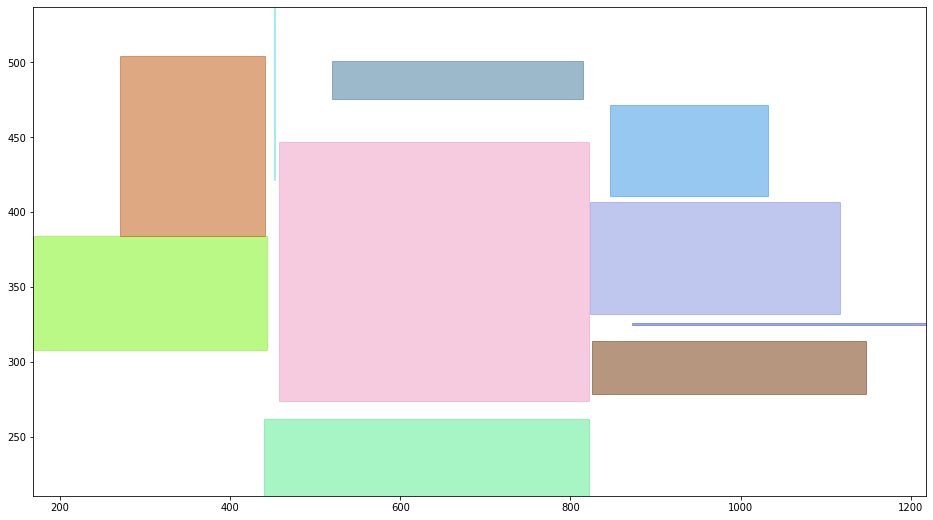

In [150]:
cloud_packer_test(10, Packer=CloudPacker)

[{'w': 0.655937511920929, 'h': 0.37781252384185793, 'window': 14680070}, {'w': 0.655937511920929, 'h': 0.37781252384185793, 'window': 14680116}, {'w': 0.5278125, 'h': 0.410625, 'window': 20971652}]

FIT [[{'w': 0.655937511920929, 'h': 0.37781252384185793, 'window': 14680070}, {'w': 0.655937511920929, 'h': 0.37781252384185793, 'window': 14680116}, {'w': 0.5278125, 'h': 0.410625, 'window': 20971652}], 1.0, 0.6000000238418579]
packed blocks: [{'w': 0.655937511920929, 'h': 0.37781252384185793, 'window': 14680070, 'fit': {'x': -0.3279687559604645, 'y': -0.18890626192092896}}, {'w': 0.655937511920929, 'h': 0.37781252384185793, 'window': 14680116, 'fit': {'x': 0.6720312440395355, 'y': -0.18890626192092896}}, {'w': 0.5278125, 'h': 0.410625, 'window': 20971652, 'fit': {'x': 0.73609375, 'y': 0.7946875}}]

shape: {'w': 0.655937511920929, 'h': 0.37781252384185793, 'window': 14680070, 'fit': {'x': -0.3279687559604645, 'y': -0.18890626192092896}}
shape: {'w': 0.655937511920929, 'h': 0.37781252384185

/tmp/ipykernel_10760/2280919299.py:40: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  Rectangle(


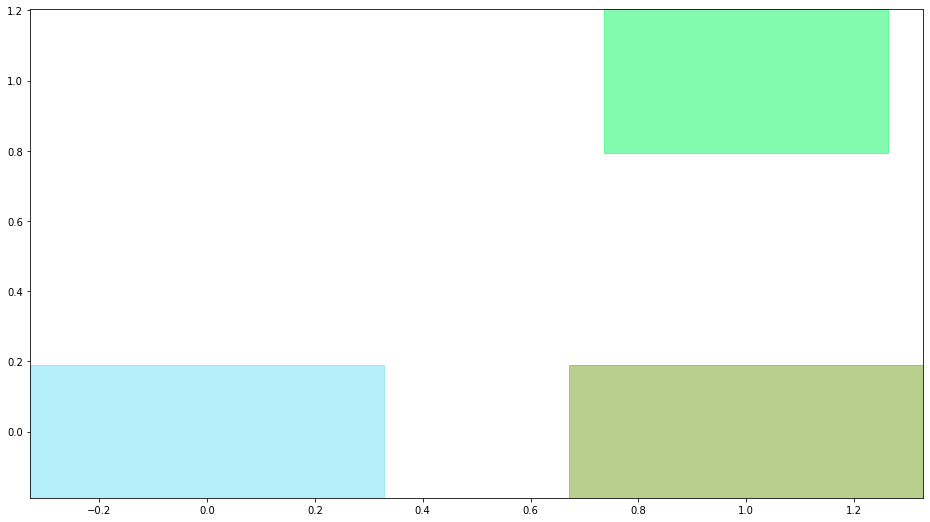

In [151]:
cloud_packer_test_blocks([{'w': 0.655937511920929, 'h': 0.37781252384185793, 'window': 14680070},
  {'w': 0.655937511920929, 'h': 0.37781252384185793, 'window': 14680116},
  {'w': 0.5278125, 'h': 0.410625, 'window': 20971652}], view_width=1.0, view_height=0.6000000238418579, margin=0,
                        Packer=CloudPacker)